# Michael Claussen

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

## MIS 665 Term Project:
### Predicting Movie Sucess

#### 1. Business Understanding
* Project Goals
   1. Determine what data should be collected - what all can influence success and what are determinants of success?
   2. Analyze how each independent variable correlates with a movie's IMDB score (score being used to determine success in this study)
   3. Come up with a lit of variables a movie producer should focus on to maximize success

**What data should be collected?**

Jeffrey Ericson and Jesse Grodman of Stanford University asked this same question when they did a study titled "A Predictor for Movie Success. They utilized IMDB, Rotten Tomatoes, and Wikipedia to come up with the following list of variables:
   1. movie title
   2. IMDB rating
   3. plot description
   4. budget
   5. box office gross
   6. opening weekend gross
   7. critic score
   8. audience score
   9. runtime
   10. MPAA rating
   11. studio
   12. theater release date
   13. DVD release date
   14. list of genres
   15. abridged list of cast
   16. abridged list of directors
   17. the number of Academy Awards that actors and directors in each movie had won prior to that movie
   18. the number of Best Picture films that actors and directors in each movie had been involved in, also prior to that movie
   
   (Ericson and Grodman, 2013)
   
This list of variables seems fitting for my study, but since we are just going to also include facebook likes for the director, the actors, and the movie itself. Also, the data I will be using includes the language, country, and aspect ratio.

#### 2. Data Understanding:
  In this section I will do the following:
  1. Describe the data
  2. Identify quality issues
  3. Identify data types
  4. Identify value counts important columns

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read data
df=pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
#get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

From this information it is clear that there are 28 columns with a variety of information about 5,043 movies. Many of these movies dont have a data entry for every column, which is evident by the range of non-null values. In the data preparation stage I will need to decide how to properly handle these null values.

This also shows that we have 13 float variables, 3 integer values, and 12 object variables.

In [5]:
# get basic statistis of data
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


This helps to show the distribution of some of the variables. We can see that there is a wide range of values for some of the variables including the gross earnings, the number of reviews, and facebook likes.

In [6]:
# Value Counts for color or b&w
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

A vast majority of the movies are in color

In [7]:
# Value Counts for director
df['director_name'].value_counts()

Steven Spielberg        26
Woody Allen             22
Clint Eastwood          20
Martin Scorsese         20
Ridley Scott            17
Steven Soderbergh       16
Spike Lee               16
Tim Burton              16
Renny Harlin            15
Oliver Stone            14
Barry Levinson          13
Michael Bay             13
Robert Zemeckis         13
Sam Raimi               13
Joel Schumacher         13
Robert Rodriguez        13
John Carpenter          13
Ron Howard              13
Kevin Smith             12
Peter Jackson           12
Brian De Palma          12
Richard Donner          12
Wes Craven              12
Shawn Levy              12
Tony Scott              12
Rob Cohen               11
Rob Reiner              11
Chris Columbus          11
Richard Linklater       11
Francis Ford Coppola    11
                        ..
Lisanne Pajot            1
Luca Guadagnino          1
Damian Nieman            1
Jeffrey St. Jules        1
Chia-Liang Liu           1
Kari Skogland            1
J

From this it is clear that there are 2368 different directors in this data with the top ten being:  
    1. Steven Spielberg        26  
    2. Woody Allen             22  
    3. Clint Eastwood          20  
    4. Martin Scorsese         20  
    5. Ridley Scott            17  
    6. Steven Soderbergh       16  
    7. Spike Lee               16  
    8. Tim Burton              16  
    9. Renny Harlin            15  
    10. Oliver Stone           14  

In [8]:
# Value Counts for Actor 1
df['actor_1_name'].value_counts()

Robert De Niro            49
Johnny Depp               41
Nicolas Cage              33
J.K. Simmons              31
Denzel Washington         30
Matt Damon                30
Bruce Willis              30
Liam Neeson               29
Harrison Ford             27
Robin Williams            27
Steve Buscemi             27
Jason Statham             26
Bill Murray               26
Robert Downey Jr.         26
Morgan Freeman            25
Tom Cruise                25
Tom Hanks                 24
Keanu Reeves              24
Christian Bale            23
Gerard Butler             22
Scarlett Johansson        22
Kevin Spacey              22
Leonardo DiCaprio         21
Sylvester Stallone        21
Anthony Hopkins           21
Hugh Jackman              21
Philip Seymour Hoffman    20
Will Ferrell              20
Matthew McConaughey       20
Dwayne Johnson            19
                          ..
Jo Hartley                 1
Aliou Touré                1
Jessica Barden             1
Sarunyu Wongkr

With slightly less variety that directors there are 2097 different lead actors. The top ten are:
    1. Robert De Niro            49
    2. Johnny Depp               41
    3. Nicolas Cage              33
    4. J.K. Simmons              31
    5. Denzel Washington         30
    6. Matt Damon                30
    7. Bruce Willis              30
    8. Liam Neeson               29
    9. Harrison Ford             27
    10. Robin Williams           27
    T10. Steve Buscemi           27

In [9]:
# Value Counts for genre
df['genres'].value_counts()

Drama                                                               236
Comedy                                                              209
Comedy|Drama                                                        191
Comedy|Drama|Romance                                                187
Comedy|Romance                                                      158
Drama|Romance                                                       152
Crime|Drama|Thriller                                                101
Horror                                                               71
Action|Crime|Drama|Thriller                                          68
Action|Crime|Thriller                                                65
Drama|Thriller                                                       64
Crime|Drama                                                          63
Horror|Thriller                                                      56
Crime|Drama|Mystery|Thriller                                    

This tells us there are 914 different genres in this data set. Many of them are multiple genres combined together. The top 10 are:
    1. Drama                                                               236
    2. Comedy                                                              209
    3. Comedy|Drama                                                        191
    4. Comedy|Drama|Romance                                                187
    5. Comedy|Romance                                                      158
    6. Drama|Romance                                                       152
    7. Crime|Drama|Thriller                                                101
    8. Horror                                                               71
    9. Action|Crime|Drama|Thriller                                          68
    10. Action|Crime|Thriller                                               65

In [10]:
# Value counts for languages
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Korean           8
Portuguese       8
Arabic           5
Swedish          5
Hebrew           5
Danish           5
Persian          4
Dutch            4
Polish           4
Norwegian        4
Thai             3
Chinese          3
None             2
Zulu             2
Aboriginal       2
Icelandic        2
Romanian         2
Dari             2
Indonesian       2
Urdu             1
Czech            1
Filipino         1
Tamil            1
Slovenian        1
Swahili          1
Aramaic          1
Greek            1
Hungarian        1
Bosnian          1
Kazakh           1
Panjabi          1
Kannada          1
Mongolian        1
Dzongkha         1
Vietnamese       1
Maya             1
Telugu           1
Name: language, dtype: int64

The top languages are English, French, and Spanish.

In [11]:
# value counts for ratings
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

Clearly, by far the most common moving rating is R followed by PG-13 and PG

In [12]:
# Value count for aspect ratio
df['aspect_ratio'].value_counts()

2.35     2360
1.85     1906
1.78      110
1.37      100
1.33       68
1.66       64
16.00      45
2.20       15
2.39       15
4.00        7
2.00        5
1.75        3
2.40        3
2.76        3
2.55        2
1.50        2
2.24        1
1.20        1
1.18        1
1.44        1
1.77        1
1.89        1
Name: aspect_ratio, dtype: int64

There are 18 different aspect ratios with a vast majority being 2.35 or 1.85

#### 3. Data Preparation

In this section I will clean and transform the data to make it more usable for analysis. This will unclude the handling of null values.

**Handling Null Values**

Because there is a very large amount of data, I feel it is safe to simply eliminate all the rows with null values

In [13]:
# remove null values
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

This leaves us with full data for 3,756 movies. More than enough to make conclusions.

**Data Transformation**

There are some columns that will need dummy variables made in order to properly examine them. These include:
    1. Color
    2. Language
    3. Aspect Ratio

In [14]:
#dummy variables to tell if b&w or color
df=pd.concat([df,pd.get_dummies(df['color'])],axis=1)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Black and White,Color
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,0,1


In [15]:
# create new table of language dummy variables
lang = pd.get_dummies(df['language'])
lang.head()

,Aboriginal,Arabic,Aramaic,Bosnian,Cantonese,Czech,Danish,Dari,Dutch,English,...,None,Norwegian,Persian,Portuguese,Romanian,Russian,Spanish,Thai,Vietnamese,Zulu
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Add the english column from the language table to the end of df - tells us english or not english
df=pd.concat([df,lang['English']],axis=1)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Black and White,Color,English
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,1,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,1,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,1,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,1,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,0,1,1


In [17]:
# make a table of dummy variables for aspect ratios
ar = pd.get_dummies(df['aspect_ratio'])
ar.head()

,1.18,1.33,1.37,1.5,1.66,1.75,1.77,1.78,1.85,2.0,2.2,2.24,2.35,2.39,2.4,2.55,2.76,16.0
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
# since 2.35 and 1.85 are the most common aspect ratios I will add those dummy columns to df
df=pd.concat([df,ar[2.35],ar[1.85]], axis=1)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Black and White,Color,English,2.35,1.85
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,2009.0,936.0,7.9,1.78,33000,0,1,1,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,2007.0,5000.0,7.1,2.35,0,0,1,1,1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,2015.0,393.0,6.8,2.35,85000,0,1,1,1,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2012.0,23000.0,8.5,2.35,164000,0,1,1,1,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,2012.0,632.0,6.6,2.35,24000,0,1,1,1,0


#### Business Intelligence
This section will provide some data visualizations that will give us some valuable information to draw conclusions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7F77F0>,
      dtype=object)

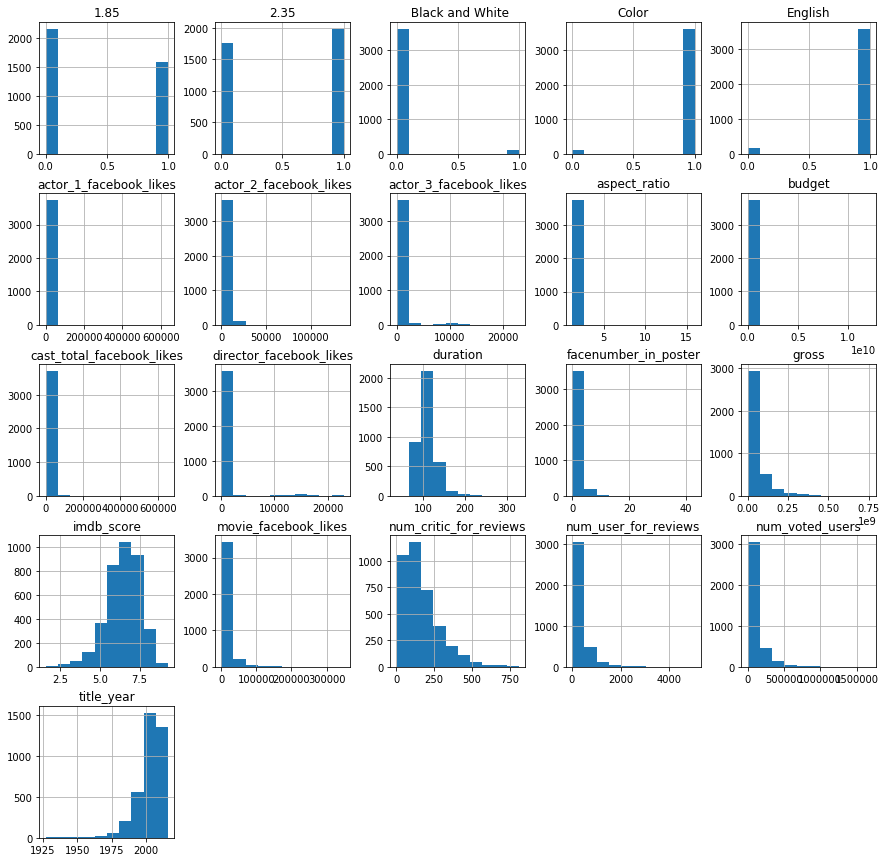

In [19]:
# histogram for all numerical columns
df.hist(figsize=(15,15))

This helps us visualize what kinds of movies are in this data. A majority are in color and English. Also, most of the movies were made fairly recently (since 2000). The distribution of imdb scores appears to be normally distributed roughly around a score of 6. 

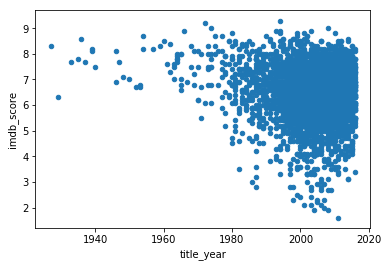

In [20]:
#create a scatter plot of the imdb ratings over the years
df.plot.scatter('title_year','imdb_score')

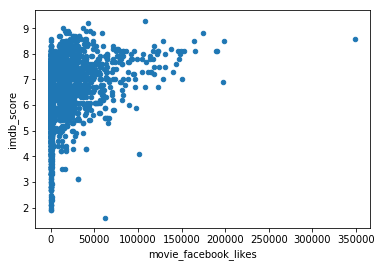

In [21]:
#create scatter plot of facebook likes and imdb rating
df.plot.scatter('movie_facebook_likes','imdb_score')

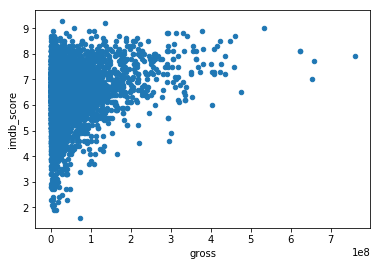

In [22]:
#create scatter of gross earnings to imdb rating
df.plot.scatter('gross', 'imdb_score')

These scatter plots help us to better understand how the IMDB score relates to title year, facebook likes, and gross earnings. Clearly more movies have been made recently, but it appears the older movies in this data rated better on average. Also, the IMDB scores seems to show a possitive correlation with gross earnings and facebook likes.

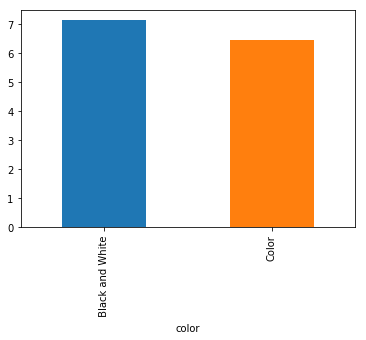

In [23]:
# look at average score for b&w movies vs color movies
df.groupby('color')['imdb_score'].mean().plot(kind='bar')

It appears B&W movies have a slightly higher average score

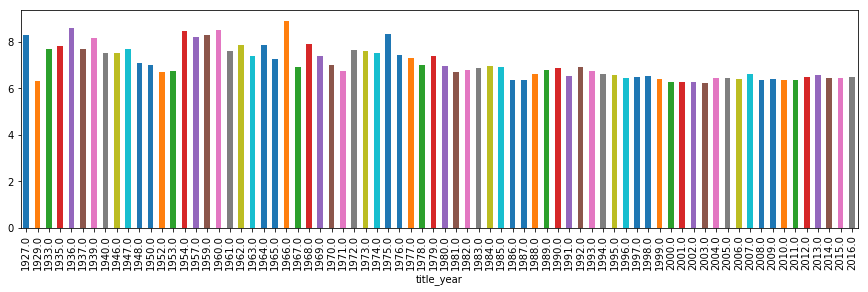

In [24]:
# look at average score for each year
plt.figure(figsize=[15,4])
df.groupby('title_year')['imdb_score'].mean().plot(kind='bar')

The trend isn't completely apparent, but it does seem there is a slight decline in average scores as you get to more recent movies.

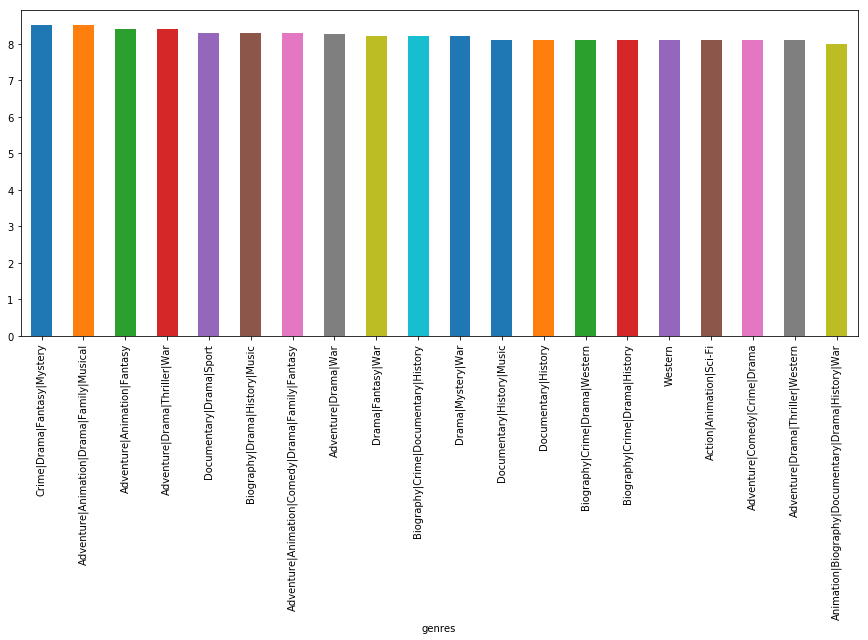

In [25]:
# create a plot that shows the average score for the top 20 genres
top20genre = df.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=[15,6])
top20genre.plot(kind='bar')

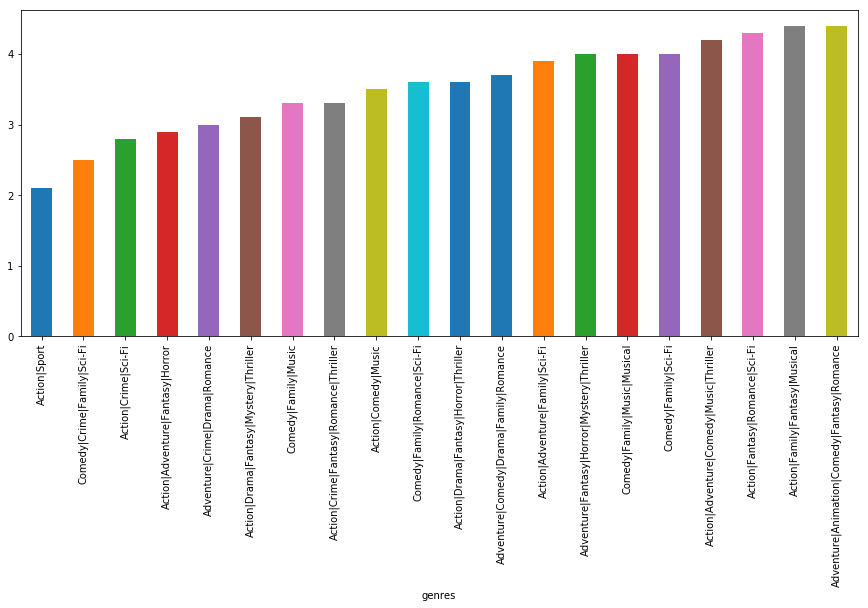

In [26]:
# to better understand the genre data I will also create a plot of the bottom 20 genres
bot20genre = df.groupby('genres')['imdb_score'].mean().sort_values(ascending=True).head(20)
plt.figure(figsize=[15,6])
bot20genre.plot(kind='bar')

Clearly there is a large disparity in rankings from the top to bottom level genres

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 45 Text xticklabel objects>)

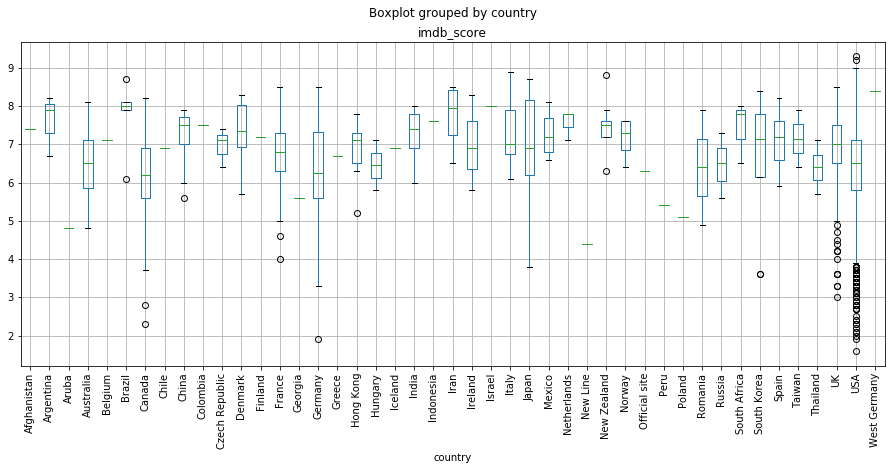

In [27]:
#look at the IMDB score distribution in each country
bplot = df.boxplot(by='country', column = 'imdb_score', figsize=(15,6))
plt.xticks(rotation=90)

The United States has the largest range of IMDB scores (which is expected since they have by far the most movies in the data set). Also, movies made in the US appear to have a slightly lower middle distribution compared to the other countries.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text xticklabel objects>)

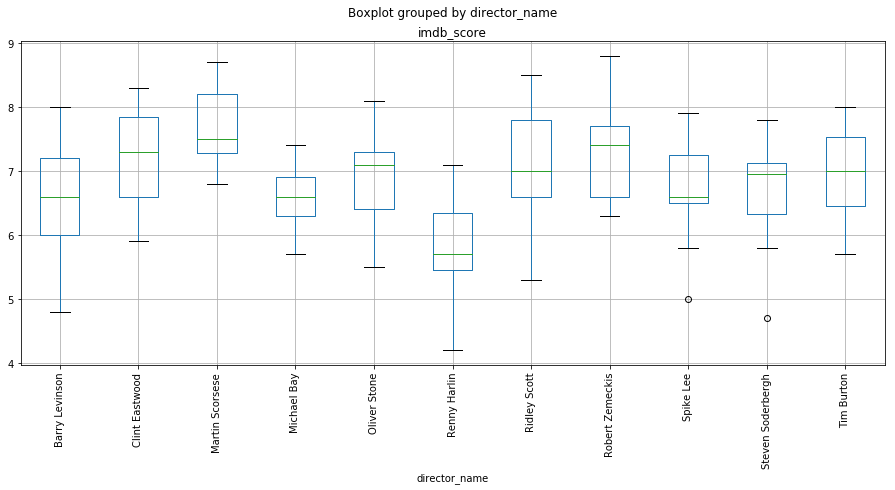

In [28]:
#Now I'll look into the data for the directors
topdir=df[(df['director_name']=='Steven Spielberg')&(df['director_name']=='Woody Allen')|(df['director_name']=='Clint Eastwood')|(df['director_name']=='Martin Scorsese')|(df['director_name']=='Ridley Scott')|(df['director_name']=='Steven Soderbergh')|(df['director_name']=='Spike Lee')|(df['director_name']=='Tim Burton')|(df['director_name']=='Renny Harlin')|(df['director_name']=='Oliver Stone')|(df['director_name']=='Barry Levinson')|(df['director_name']=='Michael Bay')|(df['director_name']=='Robert Zemeckis')]
bplot = topdir.boxplot(by='director_name', column = 'imdb_score', figsize=(15,6))
plt.xticks(rotation=90)

Clearly Martin Scorsese has made some great movies while Renny Harlin has made bad movies. 

#### 5. Correlation Analysis
in this section I will expand on the previous section by seeing how certain variables correlate to IMDB score

In [50]:
df2 = df.drop(['duration','actor_2_name','actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes', 'aspect_ratio', 'title_year','num_voted_users'], axis = 1)
df2.corr()

,num_critic_for_reviews,director_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,Black and White,Color,English,2.35,1.85
num_critic_for_reviews,1.000000,0.175128,0.165986,0.464187,0.236533,-0.034365,0.563684,0.104717,0.347886,0.705226,-0.000337,0.000337,0.022454,0.247729,-0.231028
director_facebook_likes,0.175128,1.000000,0.089630,0.138351,0.118547,-0.048067,0.217103,0.018167,0.192314,0.161962,0.058951,-0.058951,0.024125,0.055999,-0.050546
actor_1_facebook_likes,0.165986,0.089630,1.000000,0.144010,0.944813,0.057387,0.121935,0.016418,0.093597,0.130300,-0.025271,0.025271,0.085420,0.074461,-0.055524
gross,0.464187,0.138351,0.144010,1.000000,0.235601,-0.032025,0.544674,0.099496,0.214740,0.366933,-0.043164,0.043164,0.136781,0.092695,-0.092153
cast_total_facebook_likes,0.236533,0.118547,0.944813,0.235601,1.000000,0.080687,0.178675,0.028682,0.106803,0.205564,-0.029513,0.029513,0.105619,0.090341,-0.066169
facenumber_in_poster,-0.034365,-0.048067,0.057387,-0.032025,0.080687,1.000000,-0.080971,-0.021673,-0.065493,0.015185,0.004540,-0.004540,0.039379,0.020905,-0.017647
num_user_for_reviews,0.563684,0.217103,0.121935,0.544674,0.178675,-0.080971,1.000000,0.070372,0.325003,0.370465,0.069949,-0.069949,0.051634,0.147813,-0.146069
budget,0.104717,0.018167,0.016418,0.099496,0.028682,-0.021673,0.070372,1.000000,0.029190,0.052490,-0.015116,0.015116,-0.137522,0.033013,-0.025924
imdb_score,0.347886,0.192314,0.093597,0.214740,0.106803,-0.065493,0.325003,0.029190,1.000000,0.281155,0.117679,-0.117679,-0.172785,0.043697,-0.080411
movie_facebook_likes,0.705226,0.161962,0.130300,0.366933,0.205564,0.015185,0.370465,0.052490,0.281155,1.000000,-0.024683,0.024683,0.030563,0.140728,-0.139865


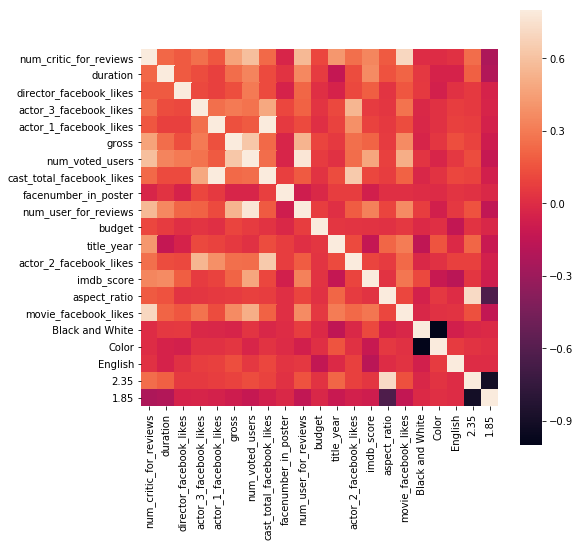

In [51]:
#to better visualize I will put it in a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),vmax=.8, square=True)

It appears IMDB score is not strongly correlated with any of the data points, but is highest with being in English, being in color, the release year, and the number of faces in the poster

Also, it is interesting to note that budget is pretty highly correlated with actor 1 facebook likes. This is obviously telling us that movies are more expensive with bigger name actors. What's interesting is that gross earning is much less correlated with the actor 1 facebook likes and budget, so clearly spending more on high level actors doesn't always equate to increased profit.

Because I noticed a high average score for movies directed by Martin Scorsese, I'm going to make a new dummy variable for Scorsee movies and see how that relates to rating.

In [52]:
#create dummy variable table and concatenate the scorsee column to df2
director=pd.get_dummies(df['director_name'])
df3=pd.concat([df2,director['Martin Scorsese']],axis=1)
df3.head()


,color,director_name,num_critic_for_reviews,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,cast_total_facebook_likes,...,content_rating,budget,imdb_score,movie_facebook_likes,Black and White,Color,English,2.35,1.85,Martin Scorsese
0,Color,James Cameron,723.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,4834,...,PG-13,237000000.0,7.9,33000,0,1,1,0,0,0
1,Color,Gore Verbinski,302.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,48350,...,PG-13,300000000.0,7.1,0,0,1,1,1,0,0
2,Color,Sam Mendes,602.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,11700,...,PG-13,245000000.0,6.8,85000,0,1,1,1,0,0
3,Color,Christopher Nolan,813.0,22000.0,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,106759,...,PG-13,250000000.0,8.5,164000,0,1,1,1,0,0
5,Color,Andrew Stanton,462.0,475.0,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,1873,...,PG-13,263700000.0,6.6,24000,0,1,1,1,0,0


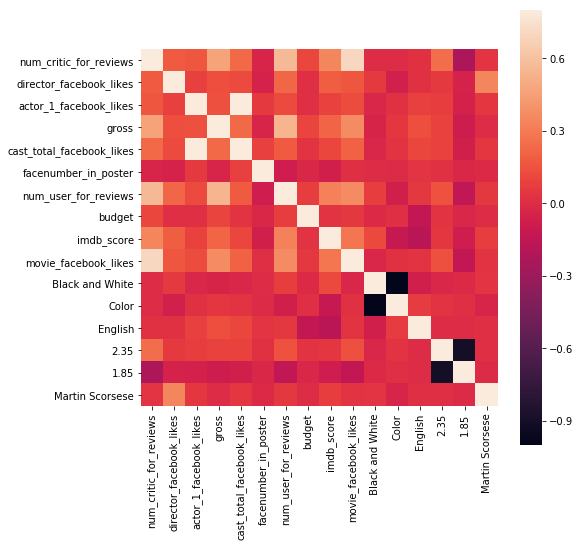

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(df3.corr(),vmax=.8, square=True)

There is a slight positive correlation between Scorsese movies and higher IMDB scores.

#### 6. Storytelling
After analyzing the data I have concluded what aspects of a movie a producer should focus on to maximize success. They are the following variables:
    1. Number of stars on the poster: This is obviously saying having a star studded cast will help get a higher score
    2. It appears a movie will perform better if it is in color and English.
    3. Of the top directors, Martin Scorsese has the best distribution of ratings
    4. Crime|Drama|Fantasy|Mystery is the genre with the highest average rating
    5. Action|Sport movies have the lowest average rating
    6. There is a slight correlation between facebook likes and a movie's success, so it's important to pay attention to that
    7. Most movies are made in the US, so it isn't  a surprise that the highest and lowest scores are from movies made here. What is kind of surprising is movies made in Iran have a high average score and an overall pretty tight distribution of scores.

## References:
1. Ericson, Jeffrey, and Jesse Grodman. “A Predictor for Movie Success.” Stanford.edu, 2013, cs229.stanford.edu/proj2013/EricsonGrodman-APredictorForMovieSuccess.pdf.



# Final Project
This section will analyze the movie data through regression, classification, and clustering.

## Regression

In [44]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 33 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [55]:
df2 = df.drop(['actor_3_name',' Black and White','Color','English',2.35,1.85,'color','director_name','movie_imdb_link','content_rating','language','country','title_year', 'movie_title','aspect_ratio','actor_1_name','actor_2_name','genres', 'plot_keywords'],axis=1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,24000


In [56]:
df2.shape

(3756, 14)

In [57]:
#define x and y
y= df2['imdb_score']
X= df2.drop(['imdb_score'],axis=1)

In [58]:
#simple multiple regression model containing all 13 columns as X variables
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,num_critic_for_reviews,1.559503e-03
1,duration,1.202263e-02
2,director_facebook_likes,6.394489e-06
3,actor_3_facebook_likes,7.579086e-05
4,actor_1_facebook_likes,7.624653e-05
5,gross,-1.816953e-09
6,num_voted_users,4.049643e-06
7,cast_total_facebook_likes,-7.569759e-05
8,facenumber_in_poster,-3.148272e-02
9,num_user_for_reviews,-5.801296e-04


In [59]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.7444922268358664
variance or r-squared:  0.33250958170628897


This simple regression model has a fairly low mean square error value, but the r-squared value is also fairly low. Also, the model uses all of the available variables making it more complicated to interpret.

In [49]:
#build a regularized regression model (Lasso, Ridge, Feature Selection, Random Forest Regresor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.10057763578274763
variance or r-squared:  0.9098661665221827


As usual the random forest regressor model gives an exceptional r-squared value and low mean square error. This is definitely a strong model.

## Classification

In [93]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [63]:
# create new column
df2['imdb_score_category'] = 4
# Set categories
df2['imdb_score_category'][df2['imdb_score'] <4 ] = 1
df2['imdb_score_category'][(df2['imdb_score'] >=4)& (df2['imdb_score']<=6)] = 2
df2['imdb_score_category'][(df2['imdb_score'] > 6)& (df2['imdb_score']<=8)] = 3
df2.head()

C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,imdb_score_category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,33000,3
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,0,3
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,85000,3
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,164000,4
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,24000,3


In [103]:
#define x and y
y= df2['imdb_score_category']
X= df2.drop(['imdb_score_category', 'imdb_score'],axis=1)

In [126]:
#split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Decision Tree classification model
dtree_model = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
print metrics.accuracy_score(y_test, dtree_model.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dtree_model.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dtree_model.predict(X_test))


0.6983141082519965
--------------------------------------------------------
[[  0  17  12   0]
 [  0 146 166   0]
 [  0 111 618   5]
 [  0   0  29  23]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        29
          2       0.53      0.47      0.50       312
          3       0.75      0.84      0.79       734
          4       0.82      0.44      0.57        52

avg / total       0.67      0.70      0.68      1127



C:\Users\Owner\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
#Model evaluation
print metrics.accuracy_score(y_test, dtree_model.predict(X_test))


0.6983141082519965


In [120]:
tree.export_graphviz(dtree_model, out_file='dt.dot', feature_names=X.columns)

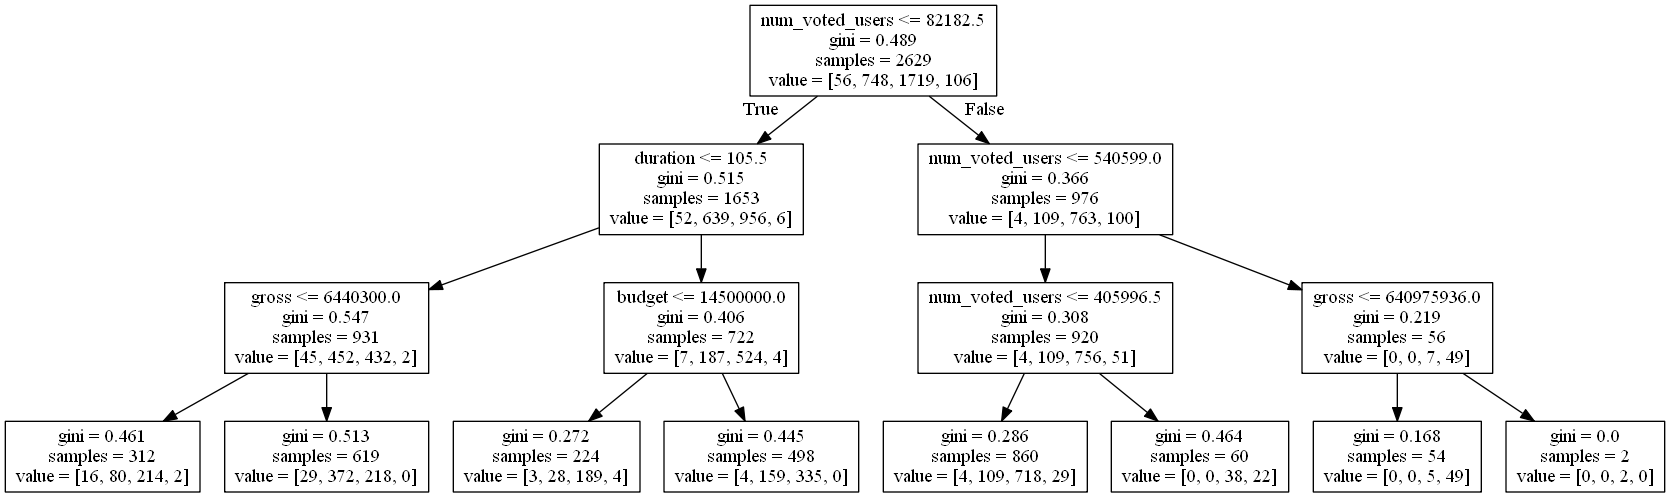

In [121]:
from IPython.display import Image
Image("dt.png")

With an accuracy of roughly 70% this model isn't too bad. Also, having the tree simplifies interpretation. We can see that the most important variable is the number of votes followed by duration then gross and budget. From the confusion matrix it is clear that this model struggles to classify the lowest level movies, but seems pretty good at predicting the higher level movies.

Text(0,0.5,'accuracy')

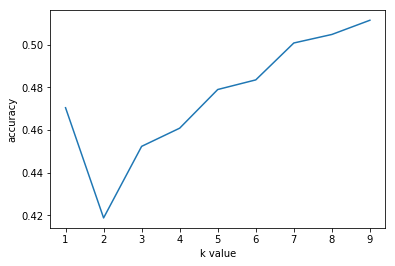

In [131]:
#KNN classification model
from sklearn.neighbors import KNeighborsClassifier
# search for an optimal value of K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

In [132]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [133]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))

0.6202307009760426
--------------------------------------------------------
[[  0   7  22   0]
 [  0  75 237   0]
 [  0 111 623   0]
 [  0   2  49   1]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        29
          2       0.38      0.24      0.30       312
          3       0.67      0.85      0.75       734
          4       1.00      0.02      0.04        52

avg / total       0.59      0.62      0.57      1127



C:\Users\Owner\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model also struggles with classifying the lower level movies, but is really great at classifying the highest level movies (100%). The overall accuracy is 62%, so it's less than the decision tree model, but still a decent classifier model.

In [134]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))

0.6379769299023957
--------------------------------------------------------
[[  0   2  27   0]
 [  0  14 295   3]
 [  0   6 679  49]
 [  0   0  26  26]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        29
          2       0.64      0.04      0.08       312
          3       0.66      0.93      0.77       734
          4       0.33      0.50      0.40        52

avg / total       0.62      0.64      0.54      1127



C:\Users\Owner\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model has decent accuracy as well at 63%, but just like the previous two models it is incapable of classifying the lowest class movies.

The overall best classification model was the decision tree model with the best overall accuracy and the best accuracy across the different classes.

## Clustering

In [135]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [149]:
#important variables
df3 = df2.drop(['num_critic_for_reviews','actor_3_facebook_likes','num_voted_users','imdb_score_category'],axis=1)

In [150]:
df3.var()

duration                     5.128738e+02
director_facebook_likes      9.413677e+06
actor_1_facebook_likes       2.408499e+08
gross                        4.944602e+15
cast_total_facebook_likes    3.656576e+08
facenumber_in_poster         4.167888e+00
num_user_for_reviews         1.691079e+05
budget                       5.108065e+16
actor_2_facebook_likes       2.065619e+07
imdb_score                   1.115657e+00
movie_facebook_likes         4.606556e+08
dtype: float64

In [151]:
#normalize
df_norm = (df3 - df3.mean()) / (df3.max() - df3.min())
df_norm.var()

duration                     0.005974
director_facebook_likes      0.017795
actor_1_facebook_likes       0.000588
gross                        0.008549
cast_total_facebook_likes    0.000848
facenumber_in_poster         0.002254
num_user_for_reviews         0.006615
budget                       0.000342
actor_2_facebook_likes       0.001101
imdb_score                   0.018817
movie_facebook_likes         0.003782
dtype: float64

Text(0.5,1,'Selecting k with the Elbow Method')

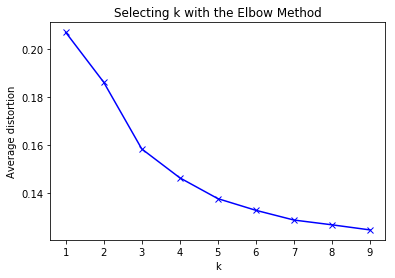

In [152]:
#optimal k
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

It appears the diminishing returns are seen the most between 5 and 6, so in my opinion 5 is the optimal k value.

In [153]:
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [154]:
# convert cluster lables to dataframe

df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,4
1,4
2,4
3,2
4,1


In [155]:
# join df3 & df1

df4 = df3.join(df1)
df4.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,cluster
0,178.0,0.0,1000.0,760505847.0,4834,0.0,3054.0,237000000.0,936.0,7.9,33000,4.0
1,169.0,563.0,40000.0,309404152.0,48350,0.0,1238.0,300000000.0,5000.0,7.1,0,4.0
2,148.0,0.0,11000.0,200074175.0,11700,1.0,994.0,245000000.0,393.0,6.8,85000,4.0
3,164.0,22000.0,27000.0,448130642.0,106759,0.0,2701.0,250000000.0,23000.0,8.5,164000,2.0
5,132.0,475.0,640.0,73058679.0,1873,1.0,738.0,263700000.0,632.0,6.6,24000,4.0


In [156]:
# cluster profiles
df4.groupby(['cluster']).mean()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
cluster,,,,,,,,,,,
0.0,110.482072,642.187251,7289.332669,5.031149e+07,11064.511952,1.362550,322.830677,3.576560e+07,2158.213147,6.439841,8692.713147
1.0,111.115261,831.554963,8235.075774,4.991590e+07,11712.661686,1.450374,322.811099,3.934770e+07,1806.616862,6.398719,8269.155816
2.0,119.375000,997.020833,7699.756944,7.625675e+07,12172.937500,1.284722,429.458333,7.546826e+07,2065.861111,6.475694,13700.548611
3.0,110.719134,931.650542,8118.935740,5.388503e+07,12264.723466,1.470758,333.204332,4.983826e+07,2246.145848,6.408087,9281.246931
4.0,119.579592,1270.008163,12055.763265,1.307138e+08,19386.077551,1.285714,638.522449,1.205114e+08,4121.583673,6.635918,21473.061224


There are 5 clusters with the following characteristics  
* Cluster 0: shortest duration, lowest average facebook likes for actors and directors, low gross earnings, and low budget
* Cluster 1: short duration, next lowest average likes, lowest gross earnings, and low budget
* Cluster 2: longer duration, mid level of likes, mid level gross earnings, and mid level budget
* Cluster 3: short duration, mid level of likes, low gross earnings, mid level budget
* Cluster 4: long duration, highest number of likes, highest gross earnings, highest budget



## Storytelling
In this section I will outline the major takeaways from the regression, classification, and clustering analysis.  

### Regression
* From the linear regression model it appears there is a negative correlation between the number of faces on a poster and the IMDB score and the next strongest relationship is a positive relation between the length of the movie and IMDB score.
* The random forrest regression model is a much better predictor of IMDB score with an R-squared value of .9 compared to .32 from the linear regression model

### Classification
* In this section I created 4 classifications for movies based on imdb score that correlates to bad, OK, good, and excellent movies. I then made several models to try to predict what class a movie will fall in.
* The strongest classification model I created was the decision tree model which had 70% accuracy when tested. From that model I could conclude a sequence of questions to ask to help classify a movie. The first question is the number of voters, and some other important questions are the budget and gross.

### Clustering
* The first step of the clustering analysis was to find the optimal number of clusters. Utilizing the elbow method to find k value with the most apparent diminishing returns, I found the optimal number of clusters to be 5. I then created a model to cluster the movies and develop profiles for those clusters. The characteristics that defined the clusters were duration, facebook likes, gross earnings, and budget.

### Conclusions
From these models a movie producer can try to find out what they can do to create a better movie. It seems a movie should try to get one or two major stars (who have a lot of likes on facebook) because that correlates with have fewer faces on the poster. They should utilize a director that is very popular (has a lot of likes on facebook), and they should make a longer duration.